### <font color=red>**★ 사용안내 ★**</font>
#### **파일을 불러오기한 후 상단메뉴 [파일> Drive 사본 저장]을 실행하면 사용자 구글드라이브 [Colab Notebooks] 폴더에 본 파일이 저장되어 지속적으로 사용할 수 있습니다**

## **마케팅 전략 수립을 위한 고객 군집화**

K-means 알고리즘 특징
- K-means은 군집을 원 모양으로 간주 한다.
- 모든 특성은 동일한 Scale을 가져야 한다.
- 이상치에 취약하다.

## <font color=green>**[ 데이터 준비 ]**

### **Step 0 : 파일 다운로드하기**
- 아래 셀을 실행시켜 프로젝트에 사용할 데이터 파일을 colab 작업환경으로 다운로드한다.
> 'Mall_Customer.csv'





In [ ]:
# colab 사용용
#!gdown 10OpMbi6xol04ovtv4ZQD4f38fYEUODpe

Downloading...
From: https://drive.google.com/uc?id=10OpMbi6xol04ovtv4ZQD4f38fYEUODpe
To: /content/II_03_Mall_Customers.csv
100% 3.97k/3.97k [00:00<00:00, 7.34MB/s]


### **Step 1 : 라이브러리 가져오기**

In [2]:
import pandas as pd

### **Step 2 : 데이터 읽기 및 정보 파악하기**
**1) 데이터 가져와 저장하기**
- 파일을 읽어 저장 후 내용을 출력한다.

In [3]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**데이터 열 :**  

| 열 번호 | 컬럼명 | 설명 |
|---------|----------|------|
| 0       | CustomerID | 고객번호
| 1       | Gender     | 성별 (Male/Female)
| 2       | Age        | 나이 (숫자)
| 3       | Annual Inocme  |연소득 (숫자, 단위: 1,000$)
| 4       | Spending Score | 소비지수, 고객의 성향에 따른 지수 (1~100)


2) 데이터 정보 파악

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

3) 데이터 처리

In [6]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### **Step 3 : 기계학습 데이터 준비**

1) 특성/타켓 지정하기
> 특성행렬 (Features) : X   

-  X : Annual_Income, Spending_Score

In [7]:
X = df[['Annual_Income', 'Spending_Score']] #코드작성

In [8]:
X.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## <font color=green>**[ 기계학습 군집화 모델 구현하기 ]**

### **Step 1. 라이브러리 가져오기**
> sklearn.cluster.KMeans : sklearn 라이브러리의 의 군집 KMeans 알고리즘 적용

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

### **Step 2. 모델 객체 생성**
> KMeans() 선언하여 모델 객체 생성하기

In [10]:
k = 5 # 군집 개수
model_km = KMeans(n_clusters=k) #코드작성

### **Step 3. 모델 학습**
> 데이터(X)로 선언한 모델(model_km)을 이용하여 학습(fit)하기

- X 데이터 프레임에 대해 모델 학습

In [11]:
#코드작성
model_km.fit(X)

c:\Users\intel09\anaconda3\envs\envtest\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, a

KMeans(n_clusters=5)

- 각 클러스터의 중심점 확인

In [12]:
#코드작성
model_km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [13]:
model_km.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

- 각 군집의 데이터 수를 확인한다.

In [14]:
#코드작성
pd.Series(model_km.labels_).value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      4
2      1
3      4
4      1
      ..
195    2
196    3
197    2
198    3
199    2
Length: 200, dtype: int32>

### **Step 4. 모델 예측**

> 데이터(X)로 속하는 그룹을 예측하기(predict())   

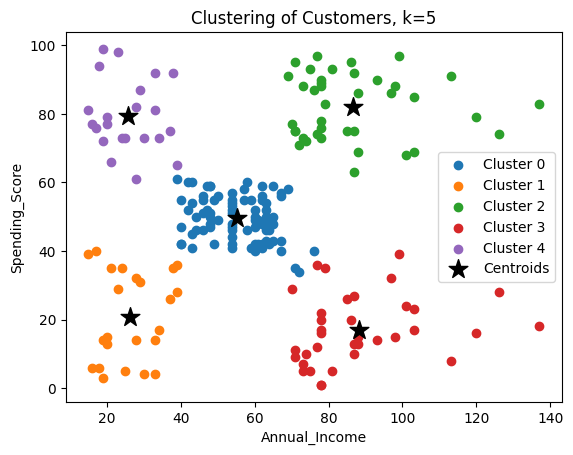

In [15]:
plt.figure()

plt.title( 'Clustering of Customers, k=' + str(k) )
plt.xlabel( X.columns[0])   # Annual_Income
plt.ylabel( X.columns[1])   # Spending_Score

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']

for i in range(k) :
    plt.scatter( X.iloc[model_km.labels_==i, 0],
                 X.iloc[model_km.labels_==i, 1],
                 c = colors[i%10],  label = 'Cluster '+ str(i) )

plt.scatter( model_km.cluster_centers_[:, 0],
             model_km.cluster_centers_[:, 1],
             c='black', marker='*', s=200, label='Centroids' )

plt.legend()
plt.show()

- 고객 분류 (그룹 0-4는 학습시마다 변경되므로 A-E 로 구분함)

  >그룹 A : 연소득이 높고 소비지수도 높은 고객

  >그룹 B : 연소득이 높고 소비지수는 낮은 고객

  >그룹 C : 연소득은 낮고 소비지수는 높은 고객

  >그룹 D : 연소득과 소비지수가 모두 중간인 고객

  >그룹 E : 연소득이 낮고 소비지수도 낮은 고객

- 특정 고객이 어느 그룹에 속하는지 확인해 보자. ( 연소득 : 85 K$, 소비지수 : 65 )

In [16]:
print (model_km.predict( pd.DataFrame( {'Annual_Income'  : [85], 'Spending_Score' : [65]} )))

[2]


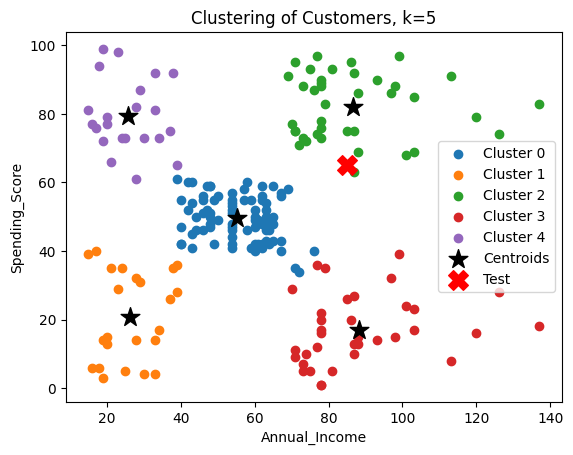

In [17]:
plt.figure()

plt.title( 'Clustering of Customers, k=' + str(k) )
plt.xlabel( X.columns[0])   # Annual_Income
plt.ylabel( X.columns[1])   # Spending_Score

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']

for i in range(k) :
    plt.scatter( X.iloc[model_km.labels_==i, 0],
                 X.iloc[model_km.labels_==i, 1],
                 c = colors[i%10],  label = 'Cluster '+ str(i) )

plt.scatter( model_km.cluster_centers_[:, 0],
             model_km.cluster_centers_[:, 1],
             c='black', marker='*', s=200, label='Centroids' )

# Annual_Income: 85, Spending_Score : 65
plt.scatter(85, 65, c = 'red', marker='X', s=200, label='Test')

plt.legend()
plt.show()

- 평가하기

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score

- 전체 군집에 대해 실루엣 지수를 확인한다.

In [19]:
#코드작성
silhouette_score(X, model_km.labels_)

np.float64(0.553931997444648)

- 각 데이터별 실루엣 지수를 확인한다.

In [20]:
silhouette_samples(X, model_km.labels_)

array([ 0.41700493,  0.69637752,  0.6399526 ,  0.6964831 ,  0.39230007,
        0.6981303 ,  0.64910316,  0.65972193,  0.63021343,  0.66350398,
        0.67788678,  0.62355268,  0.68003912,  0.71908624,  0.68070792,
        0.72573786,  0.48557434,  0.54505971,  0.58062414,  0.631684  ,
        0.46597803,  0.6774284 ,  0.64167396,  0.67170097,  0.66126882,
        0.70488566,  0.48931822,  0.30121073,  0.49570828,  0.6847372 ,
        0.60630845,  0.612474  ,  0.57697817,  0.61775968,  0.60922585,
        0.63936997,  0.58581667,  0.52897452,  0.42116018,  0.48378692,
        0.09342298,  0.54589636, -0.00927769,  0.1170758 ,  0.31116673,
        0.0507214 ,  0.38841392,  0.43312564,  0.29204034,  0.29204034,
        0.5203998 ,  0.30155503,  0.51561237,  0.34144075,  0.48988757,
        0.37332421,  0.59860522,  0.54128572,  0.63883859,  0.59367906,
        0.55806656,  0.57952023,  0.64920886,  0.50415514,  0.67809813,
        0.52881485,  0.68358333,  0.66547762,  0.52881485,  0.65

In [21]:
df_result = X.copy()
df_result['Cluster_no'] = model_km.labels_
df_result['S_score'] = silhouette_samples(X, model_km.labels_)
df_result.head()

,Annual_Income,Spending_Score,Cluster_no,S_score
0,15,39,1,0.417005
1,15,81,4,0.696378
2,16,6,1,0.639953
3,16,77,4,0.696483
4,17,40,1,0.392300


In [22]:
df_result.describe()

,Annual_Income,Spending_Score,Cluster_no,S_score
count,200.000000,200.000000,200.000000,200.000000
mean,60.560000,50.200000,1.470000,0.553932
std,26.264721,25.823522,1.442046,0.158254
min,15.000000,1.000000,0.000000,-0.023381
25%,41.500000,34.750000,0.000000,0.494253
50%,61.500000,50.000000,1.000000,0.596142
75%,78.000000,73.000000,3.000000,0.660109
max,137.000000,99.000000,4.000000,0.758069


- 각 군집에 대한 평균 실루엣 지수를 확인한다.

In [23]:
df_result.groupby('Cluster_no')['S_score'].mean()

Cluster_no
0    0.596651
1    0.512268
2    0.509171
3    0.503987
4    0.599013
Name: S_score, dtype: float64

************아래 코드 K 값이 변경되므로 이미지 작업시 주의**

In [24]:
for k in range(2, 10) :
    model_km = KMeans(n_clusters=k)
    model_km.fit(X)

    print('k =', k, ', silhouette_score : ',
          silhouette_score(X, model_km.labels_))

k = 2 , silhouette_score :  0.31827029153316977
k = 3 , silhouette_score :  0.46761358158775435
k = 4 , silhouette_score :  0.4380030150163061
k = 5 , silhouette_score :  0.553931997444648
k = 6 , silhouette_score :  0.5376203956398481
k = 7 , silhouette_score :  0.4537173684163333
k = 8 , silhouette_score :  0.44032793300201406
k = 9 , silhouette_score :  0.4425952510271926


### <font color=blue><b>실습1.
군집 갯수 4개로 적용하고 그래프로 그려보자.</font></b>

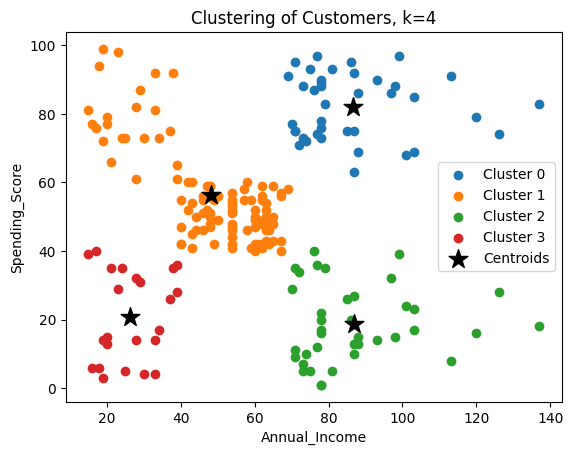

In [ ]:
# 실습1 코드
k = 4 # 군집 개수
model_km = KMeans(n_clusters=k)
model_km.fit(X)
y_pred = model_km.predict(X)

plt.figure()

plt.title('Clustering of Customers, k=' + str(k))
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']

for i in range(k) :
    plt.scatter( X.iloc[model_km.labels_==i, 0],
                 X.iloc[model_km.labels_==i, 1],
                 c = colors[i%10],  label = 'Cluster '+ str(i) )
    
plt.scatter( model_km.cluster_centers_[:, 0],
             model_km.cluster_centers_[:, 1],
             c='black', marker='*', s=200, label='Centroids' )

plt.legend()
plt.show()

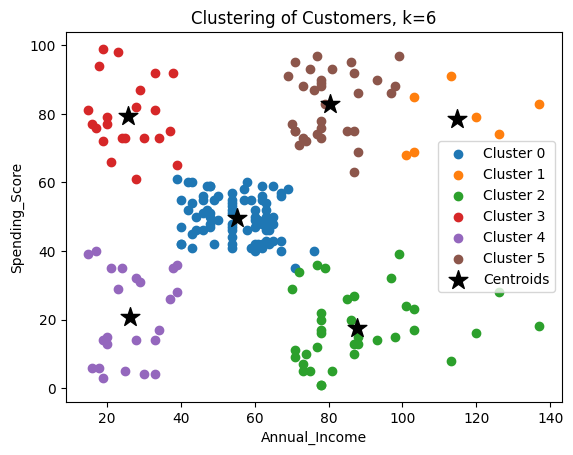

In [26]:
k = 6                         # 군집 갯수
model_km = KMeans(n_clusters=k)

model_km.fit(X)
y_pred = model_km.predict(X)

plt.figure()

plt.title( 'Clustering of Customers, k=' + str(k) )
plt.xlabel( X.columns[0])   # Annual_Income
plt.ylabel( X.columns[1])   # Spending_Score

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']

for i in range(k) :
    plt.scatter( X.iloc[model_km.labels_==i, 0],
                 X.iloc[model_km.labels_==i, 1],
                 c = colors[i%10],  label = 'Cluster '+ str(i) )

plt.scatter( model_km.cluster_centers_[:, 0],
             model_km.cluster_centers_[:, 1],
             c='black', marker='*', s=200, label='Centroids' )

plt.legend()
plt.show()

## <font color=blue>**[도전과제]**</font>
- 나이와 소비 지수를 기준으로 군집화하여 특성이 비슷한 고객을 그룹화해 본다.

▶ **도전과제 확인 사항**

1.   [프로젝트 이어서 도전과제 실행하는 경우]

 *   STEP0 ~ STEP2까지 코드 실행하지 않음

2.   [파일을 닫았다가 새로 파일을 열어 도전과제 수행 하는 경우]

 *   STEP0부터 진행

### **Step 0 : 파일 다운로드하기**
- 아래 셀을 실행시켜 프로젝트에 사용할 데이터 파일을 colab 작업환경으로 다운로드한다.
> 'II_03_Mall_Customer.csv'

In [ ]:
!gdown 10OpMbi6xol04ovtv4ZQD4f38fYEUODpe

Downloading...
From: https://drive.google.com/uc?id=10OpMbi6xol04ovtv4ZQD4f38fYEUODpe
To: /content/II_03_Mall_Customers.csv
100% 3.97k/3.97k [00:00<00:00, 5.06MB/s]


## **Step 1. 라이브러리 가져오기**
- 데이터 처리에 관한 라이브러리를 가져온다.

In [27]:
import pandas as pd

- K-평균 알고리즘인 KMeans 모델과 시각화를 위한 라이브러리를 가져온다.

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### **Step 2 : 데이터 확인하기**
- 파일을 읽어 저장 후 내용을 출력한다.


In [29]:
df = pd.read_csv('II_03_Mall_Customers.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'II_03_Mall_Customers.csv'

### **Step 3 : 데이터 준비하기**
- 군집을 위해 df의 나이(Age)와 소비 지수(Spending_Score)를 특성 항목으로 X1에 지
정한다.

In [ ]:
X1 = #코드작성
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


### **Step 4 : 모델 객체 생성하고 학습하기**
- 군집의 개수를 4로 정하고 KMeans 모델을 만들어 학습한다.

In [ ]:
k = #코드작성
model_km = #코드작성

#코드작성

KMeans(n_clusters=4)

### **Step 5 : 시각화 및 성능 평가**
**1) 군집 결과 시각화하기**
- 군집 결과를 그래프를 그려 확인한다.

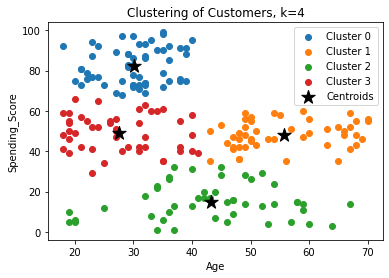

In [ ]:
plt.figure()

plt.title( 'Clustering of Customers, k=' + str(k) )
plt.xlabel( #코드작성  )   # Age
plt.ylabel( #코드작성  )   # Spending_Score

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']

for i in range(k) :
    plt.scatter( X1.iloc[#코드작성  , 0],
                 X1.iloc[#코드작성  , 1],
                 c = colors[i%10],  label = 'Cluster '+ str(i) )

plt.scatter( #코드작성[:, 0],
             #코드작성[:, 1],
             c='black', marker='*', s=200, label='Centroids' )

plt.legend()
plt.show()

2) 모델 평가하기
- 실루엣 지수(Silhouette Score)를 이용하여 전체 데이터의 군집화가 잘 이루어졌는지 평가한다.

In [ ]:
from sklearn.metrics import silhouette_score
#코드작성